In [1]:
import random
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (10,6)

random.seed(123)

In [2]:
number_of_wins = []
number_of_simulations = range(500)
door_numbers = set(range(3))
switch_wins = []
stay_wins = []

for i in number_of_simulations:
    car_door = random.randint(0,2)
    contestant_first_choice = random.randint(0,2)
    
    if car_door == contestant_first_choice:
        switch_wins.append(0)
        stay_wins.append(1)
    
    if car_door != contestant_first_choice:
        switch_wins.append(1)
        stay_wins.append(0)

In [3]:
game_results = pd.DataFrame({
    "stay_wins": stay_wins,
    "switch_wins": switch_wins,
})

game_results['plays'] = game_results['stay_wins'] + game_results['switch_wins']
game_results['cumulative_stay_wins'] = game_results['stay_wins'].cumsum()
game_results['cumulative_switch_wins'] = game_results['switch_wins'].cumsum()
game_results['cumulative_plays'] = game_results['plays'].cumsum()
game_results['cumulative_switch_win_pct'] = game_results['cumulative_switch_wins'] / game_results['cumulative_plays']
game_results['cumulative_stay_win_pct'] = game_results['cumulative_stay_wins'] / game_results['cumulative_plays']

game_results.head()

,stay_wins,switch_wins,plays,cumulative_stay_wins,cumulative_switch_wins,cumulative_plays,cumulative_switch_win_pct,cumulative_stay_win_pct
0,0,1,1,0,1,1,1.0,0.0
1,0,1,1,0,2,2,1.0,0.0
2,0,1,1,0,3,3,1.0,0.0
3,0,1,1,0,4,4,1.0,0.0
4,0,1,1,0,5,5,1.0,0.0


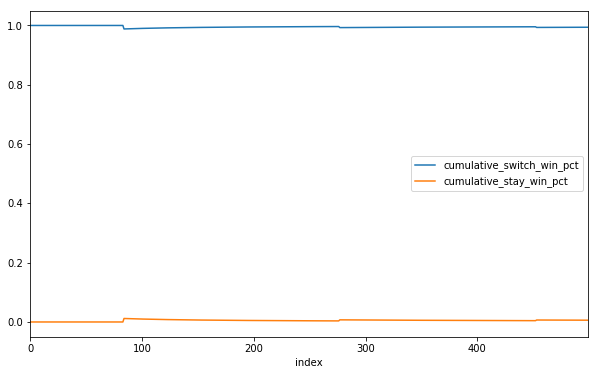

In [4]:
fig, ax = plt.subplots(1, 1)
game_results.reset_index().plot(x='index', y='cumulative_switch_win_pct', ax=ax, )
game_results.reset_index().plot(x='index', y='cumulative_stay_win_pct', ax=ax)

In [5]:
game_totals = game_results[['cumulative_switch_win_pct','cumulative_stay_win_pct']].tail(1)
game_totals

,cumulative_switch_win_pct,cumulative_stay_win_pct
499,0.994,0.006
